# Loading and Sizing Sentinel-2 Data for PCA and POD

## Gabrielle Hobson
## SIO 236 Term Paper Project

### Loading required libraries

In [1]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
#from PIL import Image
import rasterio
from time import perf_counter

### Opening data using rasterio

In [2]:
AOT_data = rasterio.open('/Users/ghobson/Documents/Spring_2021/236/Term_Paper/Data/R20m/T42DVF_20190102T041719_AOT_20m.jp2')
b2_data = rasterio.open('/Users/ghobson/Documents/Spring_2021/236/Term_Paper/Data/R20m/T42DVF_20190102T041719_B02_20m.jp2')
b3_data = rasterio.open('/Users/ghobson/Documents/Spring_2021/236/Term_Paper/Data/R20m/T42DVF_20190102T041719_B03_20m.jp2')
b4_data = rasterio.open('/Users/ghobson/Documents/Spring_2021/236/Term_Paper/Data/R20m/T42DVF_20190102T041719_B04_20m.jp2')
b5_data = rasterio.open('/Users/ghobson/Documents/Spring_2021/236/Term_Paper/Data/R20m/T42DVF_20190102T041719_B05_20m.jp2')
b6_data = rasterio.open('/Users/ghobson/Documents/Spring_2021/236/Term_Paper/Data/R20m/T42DVF_20190102T041719_B06_20m.jp2')
b7_data = rasterio.open('/Users/ghobson/Documents/Spring_2021/236/Term_Paper/Data/R20m/T42DVF_20190102T041719_B07_20m.jp2')
b8A_data = rasterio.open('/Users/ghobson/Documents/Spring_2021/236/Term_Paper/Data/R20m/T42DVF_20190102T041719_B8A_20m.jp2')
b11_data = rasterio.open('/Users/ghobson/Documents/Spring_2021/236/Term_Paper/Data/R20m/T42DVF_20190102T041719_B11_20m.jp2')
b12_data = rasterio.open('/Users/ghobson/Documents/Spring_2021/236/Term_Paper/Data/R20m/T42DVF_20190102T041719_B12_20m.jp2')
SCL_data = rasterio.open('/Users/ghobson/Documents/Spring_2021/236/Term_Paper/Data/R20m/T42DVF_20190102T041719_SCL_20m.jp2')
TCI_data = rasterio.open('/Users/ghobson/Documents/Spring_2021/236/Term_Paper/Data/R20m/T42DVF_20190102T041719_TCI_20m.jp2')
WVP_data = rasterio.open('/Users/ghobson/Documents/Spring_2021/236/Term_Paper/Data/R20m/T42DVF_20190102T041719_WVP_20m.jp2')

### Reading data into 3D numpy array

In [3]:
data = np.zeros((b4_data.height,b4_data.width,13))
data[:,:,0] = AOT_data.read(1)
data[:,:,1] = b2_data.read(1)
data[:,:,2] = b3_data.read(1)
data[:,:,3] = b4_data.read(1)
data[:,:,4] = b5_data.read(1)
data[:,:,5] = b6_data.read(1)
data[:,:,6] = b7_data.read(1)
data[:,:,7] = b8A_data.read(1)
data[:,:,8] = b11_data.read(1)
data[:,:,9] = b12_data.read(1)
data[:,:,10] = SCL_data.read(1)
data[:,:,11] = TCI_data.read(1)
data[:,:,12] = WVP_data.read(1)

### Getting smaller subset to focus in on area of interest

In [4]:
data_new = np.zeros((4020-2280,4180-2343,13))
for i in range((13)):
    data_new[:,:,i] = data[2280:4020,2343:4180,i] 
data = data_new

### Visualizing data to check all is well

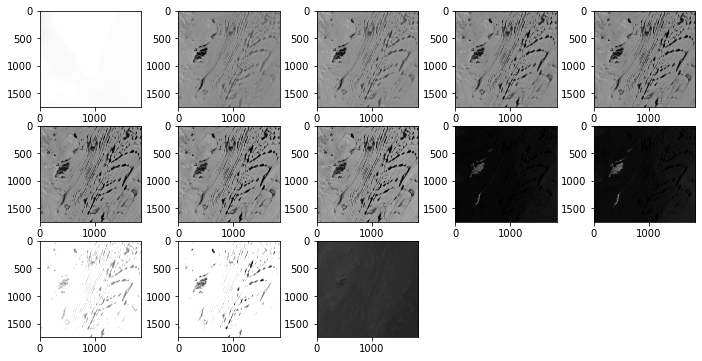

In [5]:
plt.figure(figsize=(12,6))
for i in range((13)):
    plt.subplot(3,5,i+1)
    plt.imshow(data[:,:,i],cmap=cm.gray)

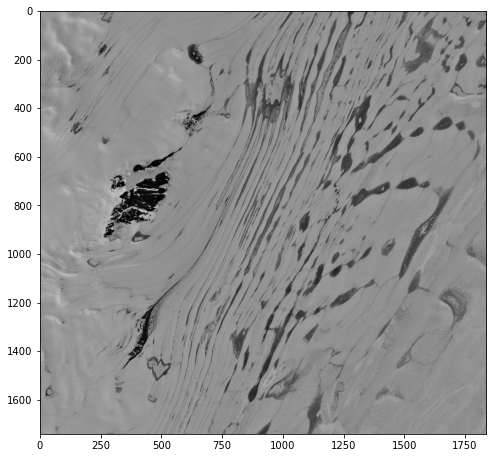

In [11]:
plt.figure(figsize=(8,8))
plt.imshow(data[:,:,2],cmap=cm.gray)

### Downsample

In [29]:
# data_ds = []
data_ds = np.zeros((np.shape(data[::4,::4,0])[0],np.shape(data[::4,::4,0])[1],13))
print(data_ds.shape)
for i in range((13)):
    data_ds[:,:,i] = data[::4,::4,i]

(435, 460, 13)


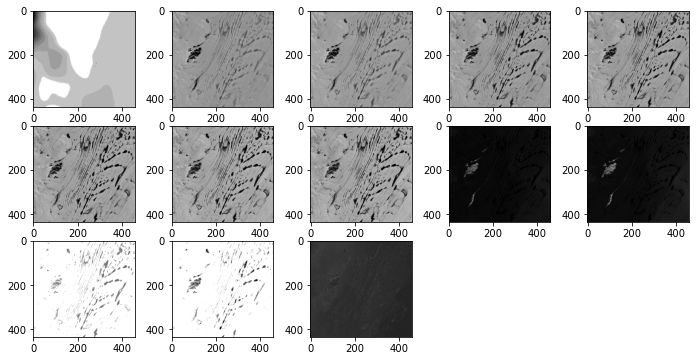

In [30]:
plt.figure(figsize=(12,6))
for i in range((13)):
    plt.subplot(3,5,i+1)
    plt.imshow(data_ds[:,:,i],cmap=cm.gray)

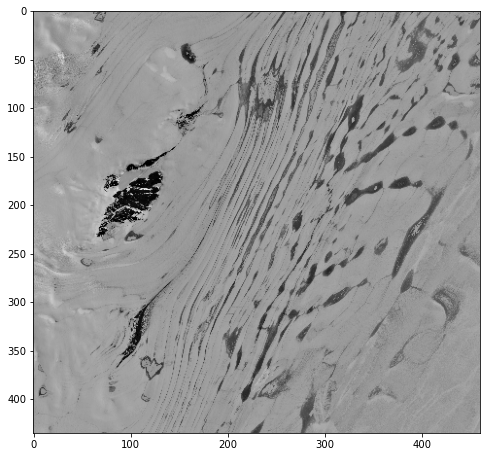

In [31]:
plt.figure(figsize=(8,8))
plt.imshow(data_ds[:,:,2],cmap=cm.gray)

### Save data to file to make it more easily uploadable to github

In [32]:
filenames = ["AOT_data.csv","b2_data.csv","b3_data.csv","b4_data.csv","b5_data.csv","b6_data.csv","b7_data.csv","b8A_data.csv","b11_data.csv","b12_data.csv","SCL_data.csv","TCI_data.csv","WVP_data.csv"]
for i in range((len(filenames))):
    np.savetxt(filenames[i], data_ds[:,:,i], delimiter=",")
    
    
    